### Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import random

### Load Data

In [2]:
Data=pd.read_csv('faithful.csv')
Data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [3]:
X=Data.values

### Visualize Data

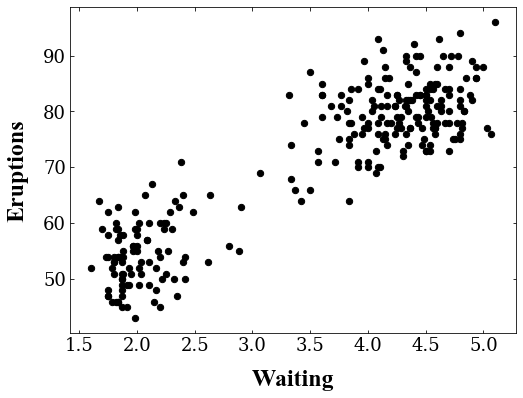

In [4]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 

plt.figure(figsize=(8,6))
plt.xlabel('Waiting', fontsize=24, **csfont)
plt.ylabel('Eruptions', fontsize=24, **csfont)
plt.scatter(X[:,0], X[:,1], color='black', s=40)

## Sklearn benchmark clustering

In [5]:
X=StandardScaler().fit_transform(X) #First it's better to standardize data

 ### Useing Sklearn Library for clustering and finding the optimum clusters using silhouette score

In [6]:
km_silhouette = []
for i in range(2,10):
    AgC = AgglomerativeClustering(n_clusters=i)
    preds = AgC.fit_predict(X)
    silhouette = silhouette_score(X,preds)
    km_silhouette.append(silhouette)

([<matplotlib.axis.XTick at 0x22b6a710eb8>,
 <a list of 4 Text xticklabel objects>)

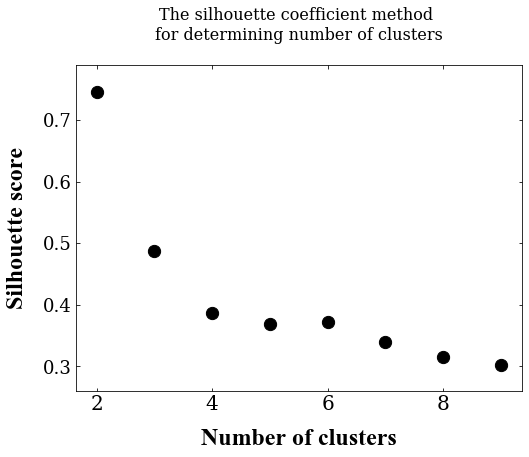

In [7]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 
plt.figure(figsize=(8,6))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=km_silhouette,s=150,color='k')
plt.xlabel("Number of clusters",fontsize=24, **csfont)
plt.ylabel("Silhouette score",fontsize=24, **csfont)
plt.xticks([i for i in range(2,10,2)],fontsize=20)


 ### Looks like we have a winner n_clusters=2

In [8]:
AgC = AgglomerativeClustering(n_clusters=2)
y_pred = AgC.fit_predict(X)


Text(0, 0.5, 'Eruptions')

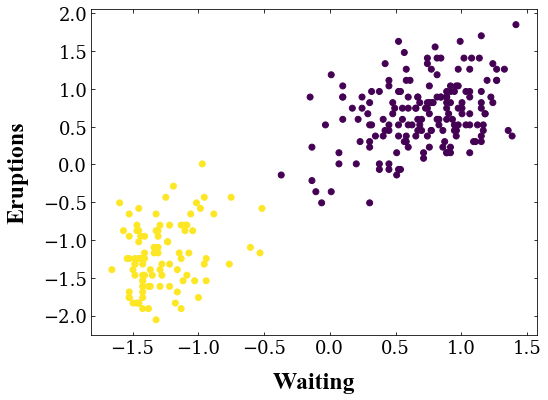

In [9]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 
plt.figure(figsize=(8,6))



plt.scatter(X[:,0], X[:,1],c=y_pred )
plt.xlabel('Waiting', fontsize=24, **csfont)
plt.ylabel('Eruptions', fontsize=24, **csfont)

## Agglomerative Hierarchical clustering: algorithm implementation

inputs: X, n_init (number of times for centroid initialization), max_iteration (integer), tol (float smaller than one), boolean variable plot to allow plotting steps,random_state

In [10]:
from sklearn.neighbors import NearestNeighbors

In [11]:
def closest_neighbors(X):
    nbrs = NearestNeighbors(n_neighbors=2).fit(X)
    distances, indices = nbrs.kneighbors(X)
    i ,j=indices[np.argmin(distances[:,1]),:]
    return i, j, np.min(distances[:,1])


In [12]:
class MyAg_H:
    def __init__(self): 
        pass
    
    def fit_predict(self,X, n_cluters, max_iteration=1000):
        """
        Fit the hierarchical clustering from features or distance matrix, and return cluster labels.
        """
        
        N = np.size(X[:,0]) #Number of samples
        #initialized centriods
        centriods=X
        X_sort=X
        
        iteration_counts=0
        
        

        while (centriods.shape[0]>=n_cluters) & (iteration_counts < max_iteration):
            
            k=centriods.shape[0]
            D=np.zeros((X.shape[0],k))
            for cluster in range(k):
                D[:,cluster]=np.sum(np.square(X-centriods[cluster,:]),axis=1)

            labels=np.argmin(D, axis=1)


            iteration_counts=iteration_counts+1
            i,j, d=closest_neighbors(centriods)
            
            
            X_new=np.delete(centriods,[i,j],axis=0)
            New_centroid=(np.array(centriods[i,:])+np.array(centriods[j,:]))/2
            centriods=np.insert(X_new,0, New_centroid, axis=0)
        return labels
    
    def find_clusters(self, X, dis=4,plot=True, max_iteration=1000):
        N = np.size(X[:,0]) #Number of samples
        #initialized centriods
        centriods=X
        X_sort=X
       
        Distance=[]
        n_c=[]
        
        iteration_counts=0

        while (centriods.shape[0]> 1) & (iteration_counts < max_iteration):
            k=centriods.shape[0]
            n_c.append(k)
            iteration_counts=iteration_counts+1
            i,j, d=closest_neighbors(centriods)
            Distance.append(d)
            
            if plot==True:
                
                if k in [100,20,6,5,4,3,2]:
                    
                    
                    
                    ypred=MyAg_H().fit_predict(X, k, max_iteration=1000)
                    #print(np.unique(ypred).shape,centriods.shape )
                    csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
                    plt.rc('font', family='serif') 
                    plt.rc('axes', labelpad=15 )
                    plt.rc('xtick', labelsize=18, direction='in',top=True) 
                    plt.rc('ytick', labelsize=18, direction='in', right=True) 
                    plt.figure(figsize=(8,6))
                    plt.xlabel('Waiting', fontsize=24, **csfont)
                    plt.ylabel('Eruptions', fontsize=24, **csfont)
                    plt.scatter(X[:,0],X[:,1], s=10, c=ypred)
                    plt.scatter(centriods[:, 0], centriods[:, 1], c=np.unique(ypred), s=90)
                    plt.show()


            
            if d < dis:
                X_new=np.delete(centriods,[i,j],axis=0)
                New_centroid=(np.array(centriods[i,:])+np.array(centriods[j,:]))/2
                centriods=np.insert(X_new,0, New_centroid, axis=0)


            else:
                break
            
        return n_c, Distance



        

### dis is the maximum distance between clusters. Helps to find cluster numbers in hierarical clustering

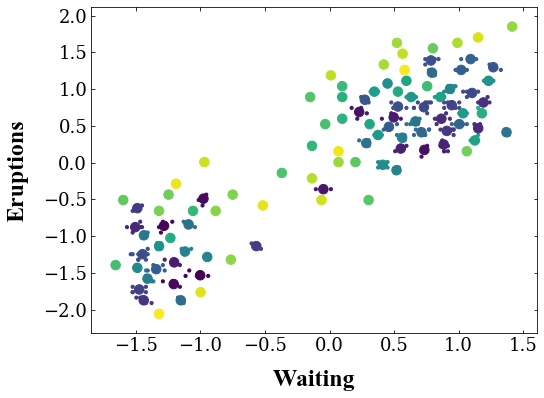

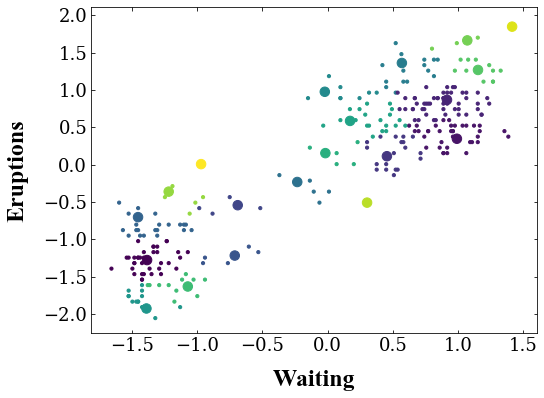

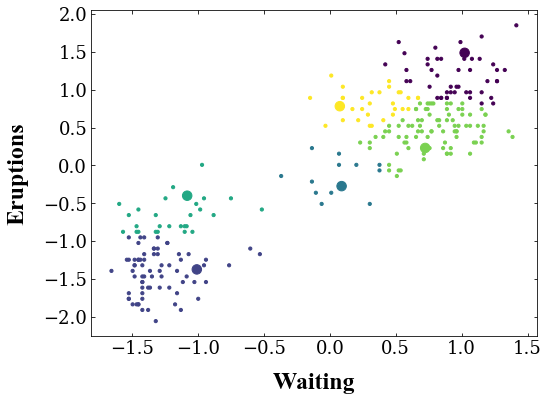

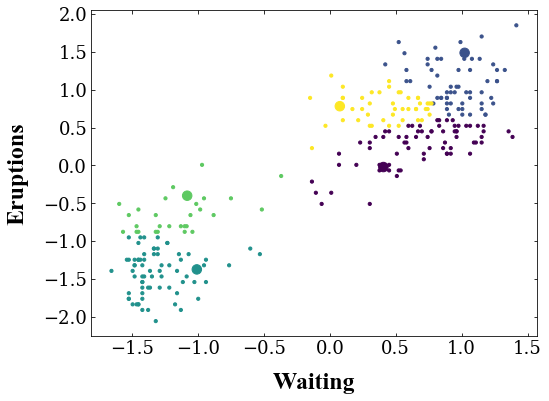

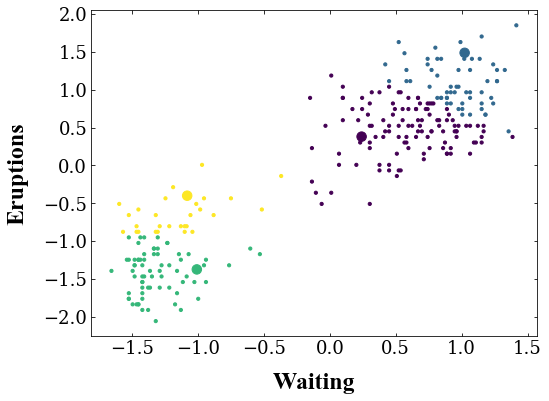

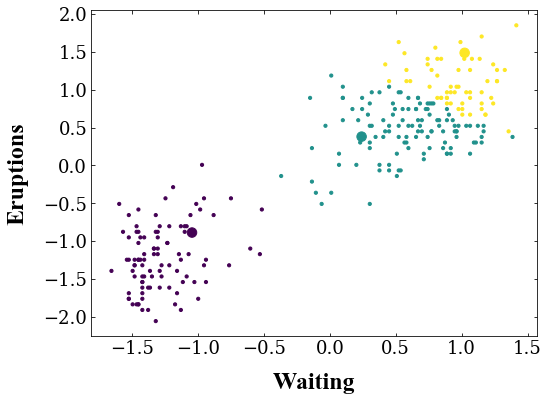

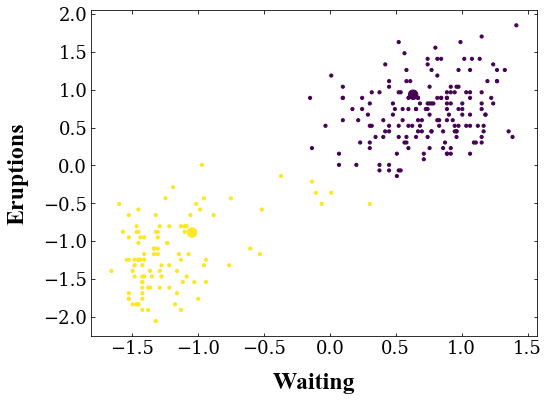

In [13]:
n_c, Distance=MyAg_H().find_clusters(X, dis=4,plot=True, max_iteration=1000) 

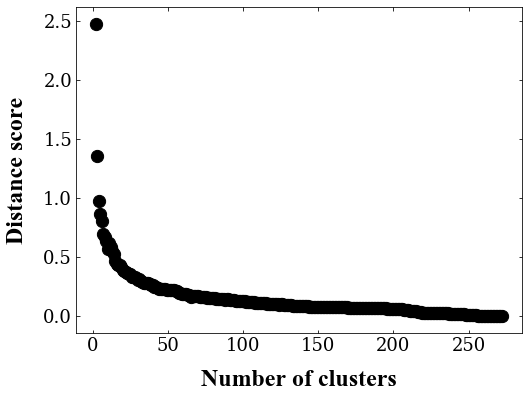

In [16]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 
plt.figure(figsize=(8,6))
plt.xlabel("Number of clusters",fontsize=24, **csfont)
plt.ylabel("Distance score",fontsize=24, **csfont)
plt.scatter(n_c,Distance,s=150,color='k')

In [17]:
km_silhouette = []
for i in range(2,10):
    preds = MyAg_H().fit_predict(X,i,1000)
    silhouette = silhouette_score(X,preds)
    km_silhouette.append(silhouette)

([<matplotlib.axis.XTick at 0x22b6c651400>,
 <a list of 8 Text xticklabel objects>)

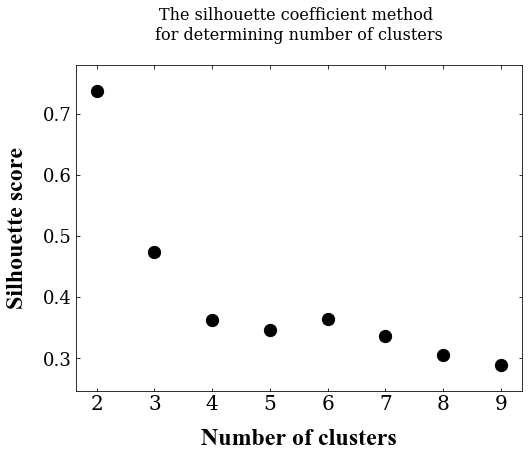

In [18]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 
plt.figure(figsize=(8,6))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=km_silhouette,s=150,color='k')
plt.xlabel("Number of clusters",fontsize=24, **csfont)
plt.ylabel("Silhouette score",fontsize=24, **csfont)
plt.xticks([i for i in range(2,10,1)],fontsize=20)

In [19]:
pred=MyAg_H().fit_predict(X,2,1000)

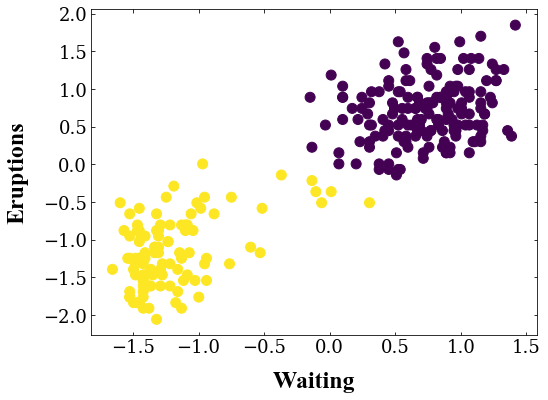

In [20]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 
plt.figure(figsize=(8,6))
plt.xlabel('Waiting', fontsize=24, **csfont)
plt.ylabel('Eruptions', fontsize=24, **csfont)
plt.scatter(X[:,0],X[:,1], s=100, c=pred)

# Similar results to sklearn library